In [1]:
import IPython.display as ipd
import pandas as pd

from augmentation import c as aug_conf
from src.config import c
from src.generator import Generator
from src.services import get_msg_provider, get_wave_provider
from lib.utils import fix_random_seed

import matplotlib.pyplot as plt

In [2]:
fix_random_seed(123)

In [3]:
wave_p = get_wave_provider(c)
msg_p = get_msg_provider(c)

In [4]:
aug_conf["v1"]

{'wave.same_class_mixing': {'chance': 1.0,
  'coeffs': [[0.75, 1],
   [0.5, 0.75],
   [0.25, 0.5],
   [0.125, 0.25],
   [0.0625, 0.125]],
  'labels': True}}

In [5]:
g = Generator(
    df=pd.read_pickle("/app/_work/dataset-C.pickle"),
    shuffle=False,
    augmentation=None,
    rating_as_sw=False,
    rareness_as_sw=False,
    msg_provider=None,
    wave_provider=wave_p,
    msg_output_size=(256, 256),
    msg_power=3,
    batch_size=10,
)

In [6]:
ga = Generator(
    df=pd.read_pickle("/app/_work/dataset-C.pickle"),
    shuffle=False,
    augmentation=aug_conf["v1"],
    rating_as_sw=False,
    rareness_as_sw=False,
    msg_provider=None,
    wave_provider=wave_p,
    msg_output_size=(256, 256),
    msg_power=3,
    batch_size=10,
)

In [7]:
# generator._shuffle_samples()
x, y, _ = g.__getitem__(125)
xa, ya, _ = ga.__getitem__(125)

In [8]:
ipd.Audio(data=x["i_wave"][0], rate=c['AUDIO_SR'])

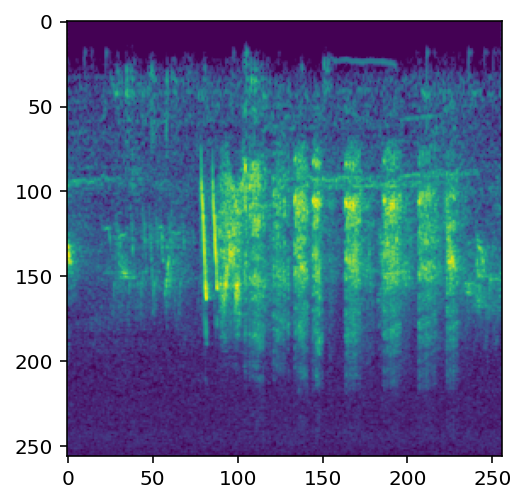

In [9]:
plt.imshow(msg_p.msg(x["i_wave"][0], 256, 256, 3))

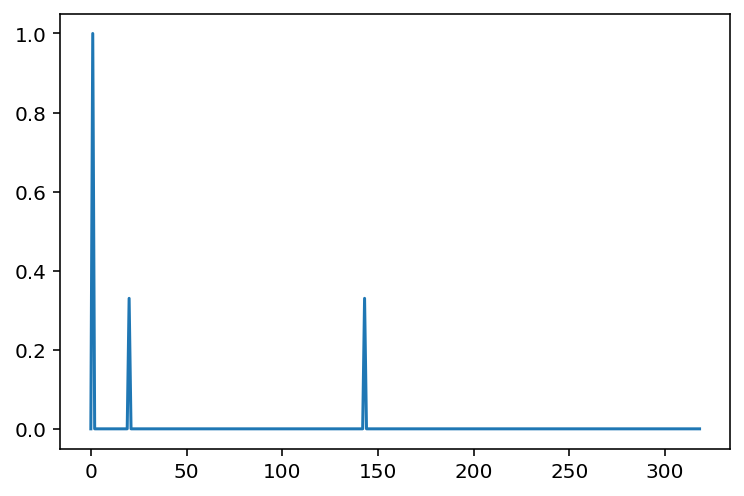

In [10]:
plt.plot(y[0])

In [11]:
ipd.Audio(data=xa["i_wave"][0], rate=c['AUDIO_SR'])

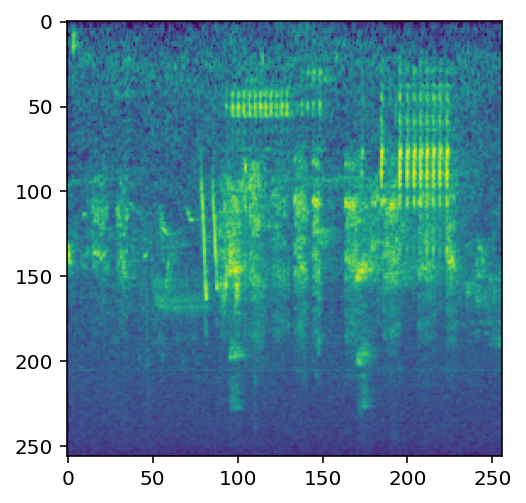

In [12]:
plt.imshow(msg_p.msg(xa["i_wave"][0], 256, 256, 3))

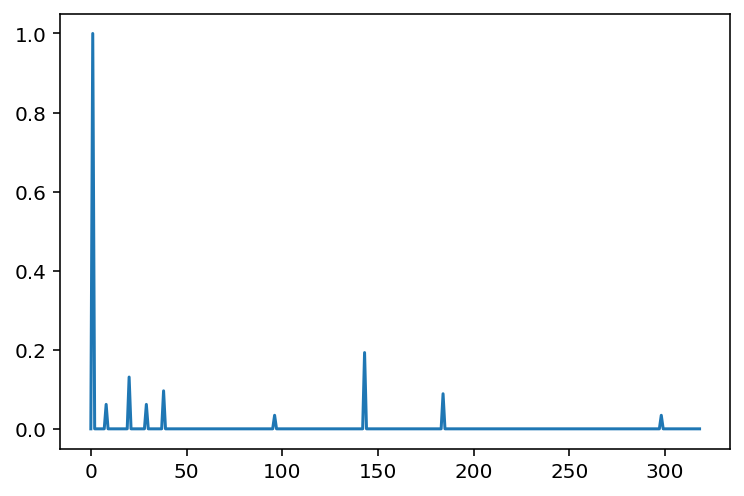

In [13]:
plt.plot(ya[0])